In [1]:
# Imports
import os
from os.path import abspath, join
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import concurrent.futures
from tqdm import tqdm
from pathlib import Path

In [2]:
# Load local libraries
# ROOT contais the project directory 
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/home/ubuntu/master_thesis


In [3]:
# Local imports
from src.Fundus import Fundus

In [4]:
# Paths
input_path = abspath(f"/mnt/data/ukbb/")
output_path = abspath(f"/mnt/data/ukbb_300x300_normalized/")

In [5]:
# If output path doesn't exist create it 
Path(output_path).mkdir(parents=True, exist_ok=True)

CPU times: user 150 ms, sys: 61.5 ms, total: 212 ms
Wall time: 182 ms


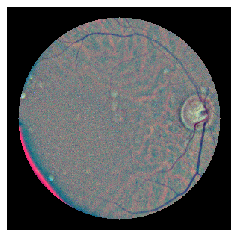

In [6]:
%%time
# Threshold
thr = 1

# Iterate over all images
for file in os.listdir(input_path)[:1]:
    
    # Get fundus object
    eye = Fundus(join(input_path, file))
    
    # Scale fundus to a given radius (in this case 700 pxls)
    # Using a threshold of 2
    eye.apply_scale_radius(150, thr)
    
    # Cropp image to be square
    eye.apply_center_crop(300, 300)
    
    # Normalize
    eye.apply_normalization()
    
    # Circular mask, slightly smaller to get rid of the whisk
    eye.apply_circular_mask(eye.get_radius(thr) * 0.97)
    
    # Save resulting image
    #eye.save(join(output_path, file))
    eye.show()

In [7]:
%%time

# Parallel implementation
def par_scale(file):
    
    # Get fundus object
    eye = Fundus(join(input_path, file))
    
    # Scale fundus to a given radius (in this case 700 pxls)
    # Using a threshold of 2
    eye.apply_scale_radius(150, thr)
    
    # Cropp image to be square
    eye.apply_center_crop(300, 300)
    
    # Circular mask, slightly smaller to get rid of the whisk
    eye.apply_circular_mask(eye.get_radius(thr)*0.97)
    
    # Save resulting image
    eye.save(join(output_path, file))

with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(par_scale, os.listdir(input_path))

#results = [r for r in results]

/home/ubuntu/master_thesis/src/Fundus.py:119: RuntimeWarning: divide by zero encountered in true_divide
  s = (scale*1.0)/self.get_radius(threshold)


CPU times: user 4h 5min 46s, sys: 5min 17s, total: 4h 11min 4s
Wall time: 1h 3min 23s
